## DEEP LEARNING PARA PROCESSAMENTO DE LINGUAGEM E VISÃO [TURMA 01B] - 2022/1
###  Trilha 4: Tarefa (Peso 3)

<p align="center"><font size='24'><b>RECONNHECIMENTO FACIAL</b></font><p>
<p align="center"><<img src="data_trilha4\reconhecimento-facial-3d-para-condominios-de-alto-padrao-portaria-remota-1024x512.jpg" width="450" height="350"></p>

<p style='text-align: justify;'><b>Reconhecimento Facial</b> é uma das aplicações mais populares em visão computacional. Na tarefa proposta, o objetivo é desenvolver um classificador utilizando <em>Redes Neurais Convolucionais</em>. Para isso, será utilizado o banco de dados <b><i>ORL Face<i></b> e utilizar o notebook como referência para completar os códigos visando a construção da <em>Rede Neural Convolucional<em></p>

<p style='text-align: justify;'>O banco de dados <b><i>ORL Face<i></b> contém 400 imagens de 40 assuntos distintos. Para alguns indivíduos, as imagens foram tiradas em momentos diferentes, variando a iluminação, expressões faciais (olhos abertos/fechados, sorrindo/não sorrindo) e detalhes faciais (óculos/sem óculos). Todas as imagens foram tiradas contra um fundo escuro e homogêneo com os sujeitos em posição vertical, frontal (com tolerância para algum movimento lateral). O tamanho original de cada imagem é 92x112 pixels, com 256 níveis de cinza por pixel.</p>

<p style='text-align: justify;'>Inicialmente, irei importar as bibliotecas necesserárias para a contrução do modelo. Eu, particularmente, optei por não seguir à risca o modelo proposto pelo professor, e sim, seguir os passos que estão previsto no e-book e outras aulas anteriores</p>

In [79]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, BatchNormalization, Activation
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import MaxPooling2D,GlobalAvgPool2D, MaxPool2D
from matplotlib import pyplot as plt
import numpy as np

In [80]:
img = np.load('data_trilha4/olivetti_faces.npy')
labels = np.load('data_trilha4/olivetti_faces_target.npy')

In [81]:
img.shape,labels.shape

((400, 64, 64), (400,))

Abaixo foi criado uma função que irá apresentar uma amostra das 40 (quarenta) imagens do conjunto de dados. Como visto anteriormente, o conjunto possui 400 imagens.

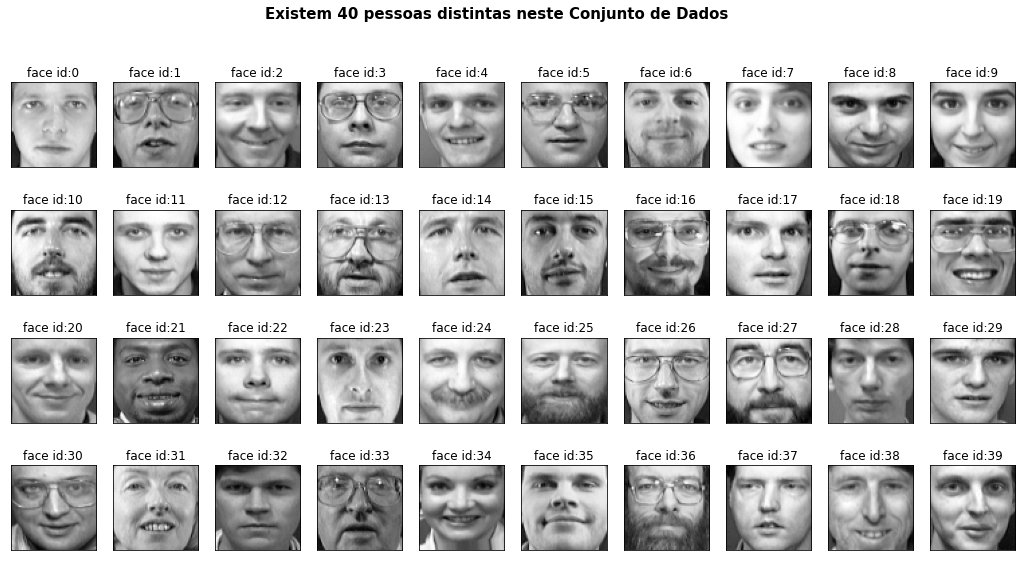

In [82]:
def show_40_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9)) # Criando 4 X 10 subplots em tamanhos de 18x9
    axarr=axarr.flatten()
    for unique_id in unique_ids: # Iterando pelos ids
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle(f"Existem {len(unique_ids)} pessoas distintas neste Conjunto de Dados", fontsize=15, fontweight='bold')

show_40_people(img,np.unique(labels))

In [83]:
num_classes = len(np.unique(labels))
num_classes # Classes únicas que serão as saídas do Modelo.

40

In [84]:
x_train, x_test, y_train, y_test = train_test_split(img, labels, test_size=0.3, random_state=123) # Separando 30% dos dados para teste.

# Transformando as imagens e normalizando os dados.
x_train = x_train.reshape(-1, 64, 64, 1)
x_train = x_train.astype('float32') / 255
x_test  = x_test.reshape(-1, 64, 64, 1)
x_test = x_test.astype('float32') / 255
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [85]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

### Construindo o modelo

In [86]:

cnn_model= Sequential([
    Conv2D(filters=128, kernel_size=3, input_shape=[64, 64, 1]),

    Conv2D(filters=1028, kernel_size=3, padding="same", activation="relu"),
	MaxPooling2D(pool_size=2),

    Conv2D(filters=516, kernel_size=3, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=1028, kernel_size=3, padding="same", activation="relu"),
    Conv2D(filters=516, kernel_size=3, padding="same", activation="relu"),
    GlobalAvgPool2D(),
    Flatten(),
    Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=128, activation='relu'),
    Dropout(0.5),


    # 40 é número de saídas da variável num_classes
	Dense(num_classes, activation='softmax')
])

### Compilando o modelo

In [ ]:
optimizer = tf.keras.optimizers.Nadam()
cnn_model.compile(optimizer=optimizer,
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

epochs = 50
history = cnn_model.fit(x_train, y_train, epochs=epochs,validation_data = (x_test,y_test))

Epoch 1/50
9/9 [==============================] - 60s 7s/step - loss: 3.6905 - accuracy: 0.0143 - val_loss: 3.6936 - val_accuracy: 0.0000e+00
Epoch 2/50
9/9 [==============================] - 60s 7s/step - loss: 3.7772 - accuracy: 0.0214 - val_loss: 3.6928 - val_accuracy: 0.0083
Epoch 3/50
4/9 [============>.................] - ETA: 32s - loss: 3.6854 - accuracy: 0.0312

### Visualizando o desempenho

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Avaliando o Modelo

In [ ]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)